In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:\新增資料夾\大四上\intern\寫書\kaggle-survey-2019")

## 一、讀取填答資料

In [3]:
multiple_choice = pd.read_csv('multiple_choice_responses.csv')

C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
multiple_choice.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1



## 二、資料預處理
1. 只抓取所需資料：年齡、性別、國籍、學歷、職業、所屬公司人數規模、公司是否使用機器學習、機器學習上的花費、分析資料的使用工具、從事資料分析的時間、平常使用的程式語言、使用機器學習方法的時間、收入
2. 國籍：只抓取印度、美國的資料 (人數最多)
3. 平常使用的程式語言：只抓取Python、R、SQL的資料 (人數最多)

In [5]:
data = multiple_choice[['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q14_Part_1_TEXT','Q14_Part_2_TEXT','Q14_Part_3_TEXT','Q14_Part_4_TEXT','Q14_Part_5_TEXT','Q15','Q18_Part_1','Q18_Part_2','Q18_Part_3','Q23','Q10']]
data = data.iloc[1:,:]
data = data[data['Q3'].isin(['India','United States of America'])]
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q23,Q10
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","We have well established ML methods (i.e., mod...","> $100,000 ($USD)",-1,-1,-1,-1,0,I have never written code,NaN,NaN,NaN,NaN,"5,000-7,499"
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,No (we do not use ML methods),$0 (USD),-1,-1,-1,1,-1,< 1 years,Python,NaN,SQL,< 1 years,"4,000-4,999"
7,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,We are exploring ML methods (and may one day p...,$100-$999,-1,-1,-1,2,-1,3-5 years,Python,R,NaN,2-3 years,"10,000-14,999"
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",$0 (USD),-1,-1,-1,3,-1,3-5 years,Python,NaN,NaN,3-4 years,"80,000-89,999"
9,22-24,Male,United States of America,Bachelor’s degree,Student,NaN,NaN,NaN,-1,-1,-1,4,-1,3-5 years,Python,NaN,NaN,1-2 years,NaN



### 設定「收入」為目標參數

In [6]:
data = data.dropna(subset = ['Q10'])
target = data['Q10']
target.replace(to_replace=sorted([*target.value_counts().keys()]), 
               value=[500,1500,12500,112500,137500,17500,175000,2500,22500,225000,27500,275000,3500,35000,400000,4500,45000,6250,55000,65000,8750,15000,85000,95000,500000],inplace=True )
data.drop('Q10',axis=1,inplace=True)
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q23
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","We have well established ML methods (i.e., mod...","> $100,000 ($USD)",-1,-1,-1,-1,0,I have never written code,NaN,NaN,NaN,NaN
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,No (we do not use ML methods),$0 (USD),-1,-1,-1,1,-1,< 1 years,Python,NaN,SQL,< 1 years
7,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,We are exploring ML methods (and may one day p...,$100-$999,-1,-1,-1,2,-1,3-5 years,Python,R,NaN,2-3 years
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",$0 (USD),-1,-1,-1,3,-1,3-5 years,Python,NaN,NaN,3-4 years
14,30-34,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",I do not know,$0 (USD),1,-1,-1,-1,-1,3-5 years,Python,NaN,NaN,2-3 years


In [7]:
target

2         6250
5         4500
7        12500
8        85000
14       95000
         ...  
19698      500
19703      500
19704     8750
19714      500
19716     1500
Name: Q10, Length: 4611, dtype: int64

### 「收入」平均大概為67000

In [8]:
target.mean()

67034.04901322923

### 設定小於67000為0  ； 大於67000為1

In [9]:
target = pd.cut(target,bins=[0,67000,500001], include_lowest=True,labels=[0,1])
target

2        0
5        0
7        0
8        1
14       1
        ..
19698    0
19703    0
19704    0
19714    0
19716    0
Name: Q10, Length: 4611, dtype: category
Categories (2, int64): [0 < 1]

### 將年齡區間改為取中間值

In [10]:
data['Q1'].replace(to_replace=['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'], value=[20,23,27,32,37,42,47,52,57,65,70],inplace=True )
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q23
2,42,Male,India,Professional degree,Software Engineer,"> 10,000 employees","We have well established ML methods (i.e., mod...","> $100,000 ($USD)",-1,-1,-1,-1,0,I have never written code,NaN,NaN,NaN,NaN
5,23,Male,India,Bachelor’s degree,Other,0-49 employees,No (we do not use ML methods),$0 (USD),-1,-1,-1,1,-1,< 1 years,Python,NaN,SQL,< 1 years
7,23,Male,India,Master’s degree,Data Scientist,50-249 employees,We are exploring ML methods (and may one day p...,$100-$999,-1,-1,-1,2,-1,3-5 years,Python,R,NaN,2-3 years
8,23,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","We recently started using ML methods (i.e., mo...",$0 (USD),-1,-1,-1,3,-1,3-5 years,Python,NaN,NaN,3-4 years
14,32,Male,United States of America,Master’s degree,Product/Project Manager,"> 10,000 employees",I do not know,$0 (USD),1,-1,-1,-1,-1,3-5 years,Python,NaN,NaN,2-3 years


### 使用獨熱編碼

In [11]:
temp = pd.get_dummies(data=data,columns=list(data).remove('Q1'))
temp

,Q1,Q2_Female,Q2_Male,Q2_Prefer not to say,Q2_Prefer to self-describe,Q3_India,Q3_United States of America,Q4_Bachelor’s degree,Q4_Doctoral degree,Q4_I prefer not to answer,...,Q18_Part_2_R,Q18_Part_3_SQL,Q23_1-2 years,Q23_10-15 years,Q23_2-3 years,Q23_20+ years,Q23_3-4 years,Q23_4-5 years,Q23_5-10 years,Q23_< 1 years
2,42,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,23,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
7,23,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8,23,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
14,32,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19698,27,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19703,20,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19704,23,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19714,20,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 三、切分資料集

In [12]:
np.random.seed(42)
perm = np.random.permutation(temp.shape[0])
X_train , y_train = temp.iloc[perm[0:round(0.8*temp.shape[0])]] , target.iloc[perm[0:round(0.8*temp.shape[0])]]
X_test , y_test = temp.iloc[perm[round(0.8*temp.shape[0])::]] , target.iloc[perm[round(0.8*temp.shape[0])::]]

<br>

## 四、建立模型

### 1. LogisticRegression

In [13]:
from sklearn.metrics import f1_score, precision_score, recall_score , accuracy_score, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import operator


clf = LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train,y_train)
coefs=np.transpose(clf.coef_)
coef_l1_LR = clf.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity achieved: %.2f%%" % sparsity_l1_LR)
feature_importance={}
for (feature,k) in zip(list(X_train),range(len(coefs))) : 
        feature_importance[feature]=abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1))
top10 = sorted_features[-10::]
top10

Sparsity achieved: 98.79%


[('Q8_I do not know', array([0.29085561])),
 ('Q23_< 1 years', array([0.30367991])),
 ('Q15_< 1 years', array([0.3111551])),
 ('Q5_Data Scientist', array([0.35106037])),
 ('Q15_10-20 years', array([0.37632146])),
 ('Q11_$10,000-$99,999', array([0.41554485])),
 ('Q11_> $100,000 ($USD)', array([0.42218625])),
 ('Q6_0-49 employees', array([0.43557946])),
 ('Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
  array([0.57696749])),
 ('Q3_India', array([3.45248057]))]

### 根據上述結果，在LogisticRegression模型下，影響薪資的重要關鍵因素，大致上可統整為：
- Q5_職業(資料分析師)
- Q11_機器學習上的花費($10,000-$99,999, >$100,000($USD))
- Q15_從事資料分析的時間(10-20年)
- Q6_公司人數規模(0-49)
- Q3_國籍(印度)
- Q8_公司是否使用機器學習
- Q23_使用機器學習方法的時間(< 1年)

<br>

In [14]:
clf = LogisticRegression(penalty='l2', C=1, tol=0.0001)
clf.fit(X_train,y_train)
y_p = clf.predict(X_test)

accuracy , precision, recall  = accuracy_score(y_test,y_p), precision_score(y_test,y_p) , recall_score(y_test,y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))
print(classification_report(y_test, clf.predict(X_test)))

Accuracy achieved by the classifier: 87.53%
Precision achieved by the classifier: 80.79%
Recall achieved by the classifier: 83.60%
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       605
           1       0.81      0.84      0.82       317

    accuracy                           0.88       922
   macro avg       0.86      0.87      0.86       922
weighted avg       0.88      0.88      0.88       922



C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 1. 整體而言，預測率（Accuracy）87.53%，精確率（Precision）80.79%，是一個還不錯的結果！
### 2. 但0與1的support分別是605與317，並不是一個很平衡的數值，因此比較precision和Recall的調和參數f1-score，分別為0.90及0.82，可以更加確定這是一個不錯的模型

<br>

### 接著可以繪製ROC Curve

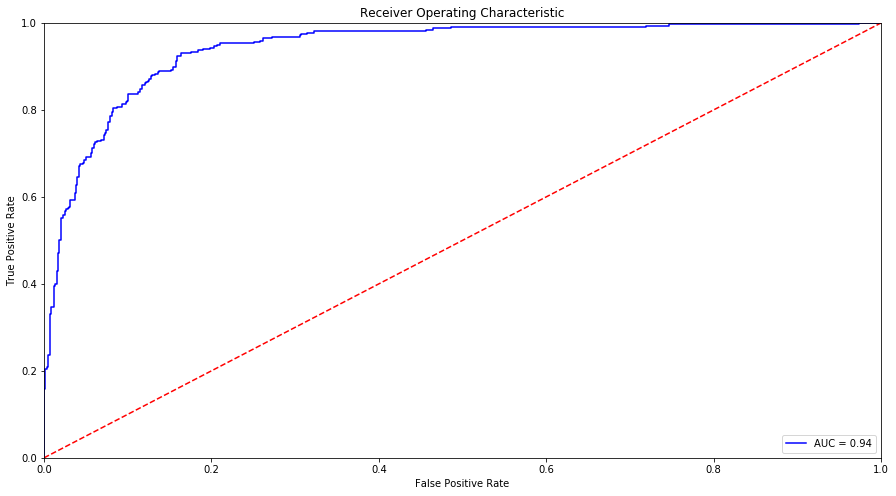

In [15]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### auc的分數是0.94，算是一個很不錯的結果！

<br>

### 2. Random Forest

In [16]:
rf = RandomForestClassifier(
    #learning_rate=0.001,大
    n_estimators=5000, 
    verbose=1,
    #max_depth=25,
    min_samples_split=2, 
    #class_weight="balanced",
    n_jobs = 7
    
    #min_weight_fraction_leaf=0.02 
    )

rf.fit(X_train, y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    3.3s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    6.8s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   12.1s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:   19.4s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:   27.4s
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:   37.7s
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:   48.8s
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:  1.0min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:  1.4min
[Parallel(n_jobs=7)]: Done 5000 out of 5000 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=7, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [17]:
rf.feature_importances_
importances = rf.feature_importances_
feat_names = X_train.columns

rf_impdf = pd.concat([pd.DataFrame(importances), pd.DataFrame(feat_names)], axis = 1)
rf_impdf.columns = ['imp_value','feat_names']
rf_impdf.head()

,imp_value,feat_names
0,0.062461,Q1
1,0.007248,Q2_Female
2,0.007722,Q2_Male
3,0.001357,Q2_Prefer not to say
4,0.000551,Q2_Prefer to self-describe


In [33]:
rf_impdf.sort_values(by = ['imp_value'] ,ascending=False)[:10]

,imp_value,feat_names
6,0.141231,Q3_United States of America
5,0.141199,Q3_India
0,0.062461,Q1
40,0.020976,"Q11_> $100,000 ($USD)"
32,0.019089,"Q8_We have well established ML methods (i.e., ..."
1795,0.016142,Q15_10-20 years
1799,0.014969,Q15_< 1 years
1811,0.014200,Q23_< 1 years
1803,0.013985,Q18_Part_3_SQL
7,0.013660,Q4_Bachelor’s degree


### 一樣根據上述結果，在RandomForest模型下，影響薪資的重要關鍵因素，大致上可統整為：
- Q3_國籍(美國、印度)
- Q1_年齡
- Q11_機器學習上的花費(10,000−99,999, >100,000(USD))
- Q8_公司是否使用機器學習
- Q15_從事資料分析的時間(10-20年, <1年, 5-10年)
- Q23_使用機器學習方法的時間(< 1年)
- Q18_平常使用的程式語言(SQL)
- Q4_學歷

In [19]:
y_p = rf.predict(X_test)

accuracy , precision, recall  = accuracy_score(y_test,y_p), precision_score(y_test,y_p) , recall_score(y_test,y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))
print(classification_report(y_test, rf.predict(X_test)))

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:    1.1s
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:    1.4s
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:    1.7s
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:    2.1s
[Parallel(n_jobs=7)]: Done 5000 out of 5000 | elapsed:    2.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s


Accuracy achieved by the classifier: 86.88%
Precision achieved by the classifier: 80.62%
Recall achieved by the classifier: 81.39%


[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:    0.8s
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:    1.1s
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:    1.5s
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:    1.8s


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       605
           1       0.81      0.81      0.81       317

    accuracy                           0.87       922
   macro avg       0.85      0.86      0.85       922
weighted avg       0.87      0.87      0.87       922



[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:    2.3s
[Parallel(n_jobs=7)]: Done 5000 out of 5000 | elapsed:    2.3s finished


### 1. 整體而言，預測率（Accuracy）86.88%，精確率（Precision）80.62%，也是一個還不錯的模型！
### 2. 0與1的support分別是605與317，也不是一個很平衡的數值，因此比較f1-score，分別為0.90及0.81，可以確定這是一個還不錯的模型!

<br>

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.3s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:    0.7s
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:    1.0s
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:    1.4s
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:    1.7s
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:    2.2s
[Parallel(n_jobs=7)]: Done 5000 out of 5000 | elapsed:    2.2s finished


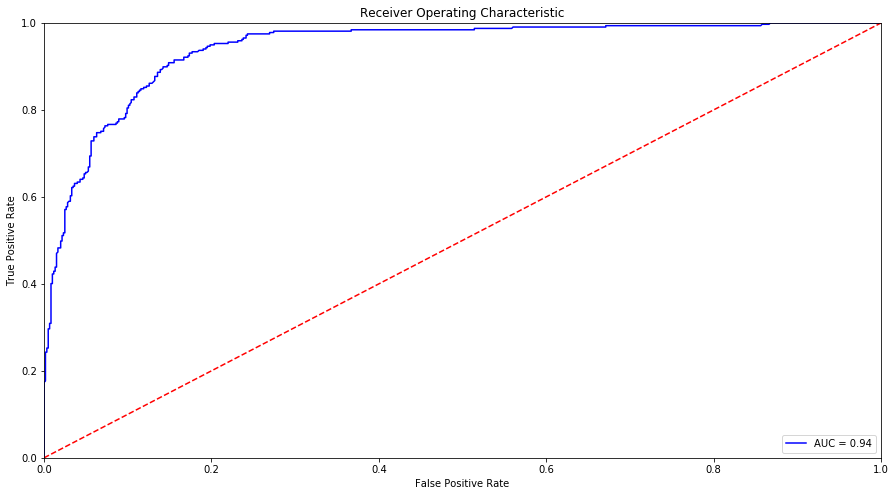

In [20]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 繪製ROC Curve後，auc的分數也是0.94，兩者都算是一個不錯的模型！

<br>

### 3. Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
imp = lr.coef_

In [22]:
lr_impdf = pd.concat([pd.DataFrame(imp), pd.DataFrame(list(temp))], axis = 1)
lr_impdf.columns = ['imp_value','feat_names']
lr_impdf.head()

,imp_value,feat_names
0,2.731870e-03,Q1
1,8.955689e+09,Q2_Female
2,8.955689e+09,Q2_Male
3,8.955689e+09,Q2_Prefer not to say
4,8.955689e+09,Q2_Prefer to self-describe


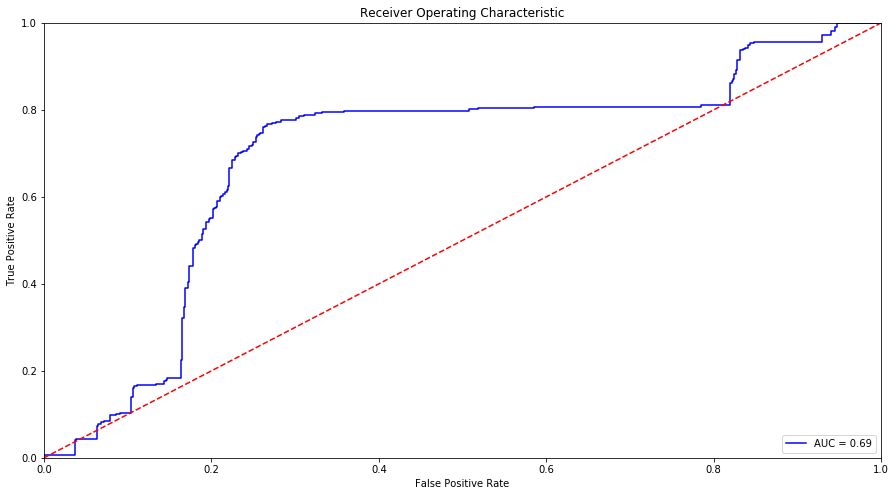

In [23]:
probs = lr.predict(X_test)
preds = probs
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Linear Regression的auc值為0.69，跟Logistic Regression及Random Forest的結果相比之下有一段差距，因此此份資料集應該不太適合Linear Regression模型

<br>

### 4. Decision Tree

In [24]:
from sklearn import tree
tre = tree.DecisionTreeClassifier()
tre.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
y_p = tre.predict(X_test)

accuracy , precision, recall  = accuracy_score(y_test,y_p), precision_score(y_test,y_p) , recall_score(y_test,y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))
print(classification_report(y_test, tre.predict(X_test)), roc_auc)

Accuracy achieved by the classifier: 81.56%
Precision achieved by the classifier: 72.48%
Recall achieved by the classifier: 74.76%
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       605
           1       0.72      0.75      0.74       317

    accuracy                           0.82       922
   macro avg       0.80      0.80      0.80       922
weighted avg       0.82      0.82      0.82       922
 0.6942774460984957


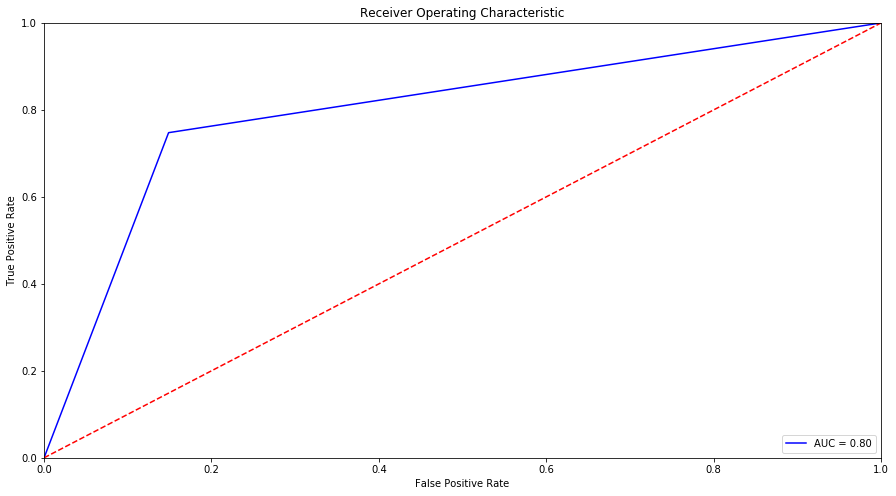

In [26]:
probs = tre.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree的auc為0.80，跟其它模型相比之下排行在中間，不是預測模型的最佳首選

<br>

## 五、各模型比較

In [27]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

clf = [LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear'),
       RandomForestClassifier(n_estimators=5000, verbose=1, min_samples_split=2, n_jobs = 7),
       tree.DecisionTreeClassifier(random_state=42),
       KNeighborsClassifier(),
       svm.LinearSVC()]

clf_value = []
for i in clf:
    model = i.fit(X_train,y_train)
    y_p = model.predict(X_test)
    accuracy , precision, recall, f1 = accuracy_score(y_test,y_p), precision_score(y_test,y_p) , recall_score(y_test,y_p), f1_score(y_test,y_p)
    clf_value.append([accuracy , precision, recall, f1])

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    2.7s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    6.8s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:   12.6s
[Parallel(n_jobs=7)]: Done 1236 tasks      | elapsed:   19.3s
[Parallel(n_jobs=7)]: Done 1786 tasks      | elapsed:   28.9s
[Parallel(n_jobs=7)]: Done 2436 tasks      | elapsed:   39.6s
[Parallel(n_jobs=7)]: Done 3186 tasks      | elapsed:   52.4s
[Parallel(n_jobs=7)]: Done 4036 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 4986 tasks      | elapsed:  1.5min
[Parallel(n_jobs=7)]: Done 5000 out of 5000 | elapsed:  1.5min finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436

In [28]:
clf_temp = pd.DataFrame(clf_value)
clf_temp.columns = ["accuracy" , "precision", "recall", "f1_score"]
clf_temp['model'] = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN', 'SVM']
clf_temp = clf_temp[['model',"accuracy", "precision", "recall", "f1_score"]]
clf_temp

,model,accuracy,precision,recall,f1_score
0,Logistic Regression,0.862256,0.755376,0.886435,0.815675
1,Random Forest,0.868764,0.810127,0.807571,0.808847
2,Decision Tree,0.823210,0.736196,0.757098,0.746501
3,KNN,0.865510,0.786350,0.835962,0.810398
4,SVM,0.876356,0.812308,0.832808,0.822430


### 由上述結果可以發現各個模型的表現差距不大，只有decision tree的預測結果表現比較差一點

<br>

## 六、結論

1. 從Logistic Regression 及 Random Forest 模型，大致可統整出較影響薪資的重要關鍵因素為：
    - Q3_國籍
    - Q8_公司是否使用機器學習
    - Q11_機器學習上的花費
    - Q15_從事資料分析的時間
    - Q23_使用機器學習方法的時間
<br>可以從此結果分析 → 國籍與投入的時間、金錢，會影響擔任的工作與服務的公司，進而影響薪資<br>
<br>
2. 此份資料的預測分析並不困難，需多模型都可以有不錯的表現，以下是我對於使用模型的建議：
    - 最佳、首選 → SVM
    - 次佳、可以嘗試 → Logistic Regression、Random Forest、KNN
    - 較不建議 → Decision Tree
<br> 
<br>
3. 未來目標：
    - 使用GridSearchCV調參
    - 加上不同模型
    - 建立更多變數的預測模型 